<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Осень 2020</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/t/f50bc21dbe0e42dabe5e32a21f2e5235) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика. 

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [ ]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [ ]:
data = pd.read_csv('./drive/MyDrive/DLS/13/train.csv')
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [ ]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [ ]:
# YOUR CODE
count_nan = data.isna().sum(axis=0)

for i in feature_cols:
  data[i]=data[i].fillna(data[i].value_counts().argmax())

data['TotalSpent']=pd.to_numeric(data['TotalSpent'], errors='coerce')
data['TotalSpent'].isna().sum()



0

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

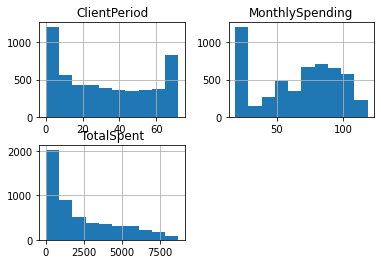

In [ ]:
# YOUR CODE
%matplotlib inline
data[num_cols].hist()
plt.show()
#pd.to_numeric(data[num_cols].value).astype('float64') #.plot(kind="hist")


(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [ ]:
# YOUR CODE
# data['TotalSpent']=pd.to_numeric(data['TotalSpent'], errors='coerce')
# data['TotalSpent'].isna().sum()

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [ ]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer

In [ ]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [ ]:
# YOUR CODE
normalized_num_data = data[num_cols]
pd.options.mode.chained_assignment = None
for (i,j) in normalized_num_data.iteritems():
  normalized_num_data[i] = (j-j.mean())/j.std()
normalized_num_data

,ClientPeriod,MonthlySpending,TotalSpent
0,0.920680,-1.505304,-0.555799
1,1.613135,-1.294875,-0.183022
2,-1.278884,0.363702,-0.974675
3,-0.016171,0.476373,0.124508
4,1.124343,1.667699,1.970413
...,...,...,...
5277,-1.197418,-1.144095,-0.971921
5278,0.717017,-0.678501,-0.043647
5279,-1.278884,-0.327234,-0.983864
5280,-0.138369,0.367016,-0.031835


In [ ]:
dummy_features = pd.get_dummies(data[cat_cols])

X = pd.concat([data[num_cols], dummy_features], axis=1)
y = data[target_col]

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    train_size=0.8,
                                                    random_state=42)
logregrCV = LogisticRegressionCV(scoring='roc_auc', refit=True)
print(X_train)
print(y_train)
logregrCV.fit(X_train, y_train)
y_pred = logregrCV.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred[:,1]))
# num_features = []
# for i in num_cols:
#     position = data.columns.get_loc(i)
#     num_features.append(position)
# cat_features = []
# for i in cat_cols:
#     position = data.columns.get_loc(i)
#     cat_features.append(position)
      
# col_transformer = make_column_transformer(
#     (num_cols, StandardScaler()),
#     (cat_cols, OneHotEncoder(sparse=False))
# )
# col_transformer.fit_transform(X_train).shape	


# onehotenc = OneHotEncoder()
# onehotenc.fit(data[cat_cols])
# labelenc= LabelEncoder()
# labelenc.fit(cat_cols)
# labelenc_labels = labelenc.transform(cat_cols)
# onehot_labels = onehotenc.transform(data[cat_cols]).toarray()
# print(onehot_labels)
# print(labelenc_labels)

[[3.10000e+01 7.35500e+01 2.09465e+03 ... 1.00000e+00 0.00000e+00
  0.00000e+00]
 [5.90000e+01 1.00050e+02 6.03485e+03 ... 0.00000e+00 0.00000e+00
  1.00000e+00]
 [6.00000e+01 9.90000e+01 6.01790e+03 ... 0.00000e+00 1.00000e+00
  0.00000e+00]
 ...
 [5.00000e+01 2.05500e+01 1.07025e+03 ... 1.00000e+00 0.00000e+00
  0.00000e+00]
 [8.00000e+00 8.45000e+01 6.62650e+02 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [6.80000e+01 5.44500e+01 3.67495e+03 ... 1.00000e+00 0.00000e+00
  0.00000e+00]]
[0 0 0 ... 0 1 0]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.8297854655941485


In [ ]:
# class MyOneHotEncoder(OneHotEncoder):
#   def fit_transform(self, y, *args, **kwargs):
#     return super().fit_transform(y).reshape(-1, 1)

#   def transform(self, y, *args, **kwargs):
#     return super().transform(y).reshape(-1, 1)
# cls = make_pipeline(
#     LogisticRegression(),
#     (num_cols, StandardScaler()),
#     (cat_cols, OneHotEncoder())
# )

TypeError: ignored

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [ ]:
!pip install catboost
import catboost

In [ ]:
# YOUR CODE
cat_features_num = []
for i in cat_cols:
    position = data.columns.get_loc(i)
    cat_features_num.append(position)

X_origin = data[feature_cols]
y = data[target_col]
X_train_origin, X_test_origin, y_train_origin, y_test_origin = train_test_split(X_origin.values, y.values, 
                                                       train_size=0.8, 
                                                       random_state=42)
boosting_model = catboost.CatBoostClassifier(n_estimators=300, 
                                             cat_features=cat_features_num)

boosting_model.fit(X_train_origin, y_train_origin)

y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]

train_auc = roc_auc_score(y_train_origin, y_train_predicted)
test_auc = roc_auc_score(y_test_origin, y_test_predicted)

print(train_auc)
print(test_auc)


Learning rate set to 0.057497
0:	learn: 0.6543682	total: 14.7ms	remaining: 4.4s
1:	learn: 0.6229757	total: 27.3ms	remaining: 4.06s
2:	learn: 0.5934546	total: 40.8ms	remaining: 4.04s
3:	learn: 0.5687275	total: 54ms	remaining: 3.99s
4:	learn: 0.5483676	total: 69.3ms	remaining: 4.09s
5:	learn: 0.5309979	total: 83.6ms	remaining: 4.1s
6:	learn: 0.5159914	total: 95.1ms	remaining: 3.98s
7:	learn: 0.5051588	total: 101ms	remaining: 3.69s
8:	learn: 0.4928039	total: 116ms	remaining: 3.75s
9:	learn: 0.4822340	total: 132ms	remaining: 3.81s
10:	learn: 0.4741872	total: 141ms	remaining: 3.71s
11:	learn: 0.4666144	total: 156ms	remaining: 3.74s
12:	learn: 0.4601273	total: 171ms	remaining: 3.77s
13:	learn: 0.4532558	total: 187ms	remaining: 3.81s
14:	learn: 0.4472510	total: 204ms	remaining: 3.87s
15:	learn: 0.4431511	total: 220ms	remaining: 3.9s
16:	learn: 0.4378468	total: 234ms	remaining: 3.9s
17:	learn: 0.4333277	total: 248ms	remaining: 3.89s
18:	learn: 0.4294944	total: 261ms	remaining: 3.85s
19:	learn:

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

In [ ]:
best_model = boosting_model

In [ ]:
X_test = pd.read_csv('./drive/MyDrive/DLS/13/test.csv')
submission = pd.read_csv('./drive/MyDrive/DLS/13/submission.csv',index_col=False)
#submission.Id.str.split(',').apply(pd.Series)

cols = ['Id', 'Churn']
submission['Churn'] = best_model.predict_proba(X_test)[:,1] # / best_model.predict(X_test)

print(submission.head())
submission.to_csv('./drive/MyDrive/DLS/13//my_submission.csv', index=False)

   Id     Churn
0   0  0.024553
1   1  0.779740
2   2  0.635667
3   3  0.021659
4   4  0.001287


# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.